**классификатор LSTM на Keras+TensorFlow**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng

In [2]:
n_samples = 100 # количество примеров
seq_len = 3 # длина последовательности
code_len = 8 # размер элемента последовательности

# генерируем случайные примеры
x_train = rng.rand(n_samples,seq_len,code_len)
x_train.shape

(100, 3, 8)

In [3]:
x_train[:3,:]

array([[[0.46312762, 0.31728351, 0.54248284, 0.1713653 , 0.89257302,
         0.68168386, 0.65807361, 0.33720055],
        [0.34922231, 0.1650813 , 0.82329615, 0.44416724, 0.05558293,
         0.6718969 , 0.32710867, 0.66020332],
        [0.71025834, 0.35636579, 0.7817398 , 0.57224527, 0.87406796,
         0.37642714, 0.65475601, 0.24388891]],

       [[0.57865782, 0.33336241, 0.08791493, 0.3783474 , 0.21281024,
         0.37484678, 0.25111431, 0.54337329],
        [0.14528015, 0.54329961, 0.49696582, 0.7739768 , 0.42940703,
         0.25068985, 0.34762054, 0.58769613],
        [0.17599936, 0.94735836, 0.95134603, 0.44876591, 0.32561365,
         0.21732946, 0.06560873, 0.90143354]],

       [[0.9798648 , 0.65413956, 0.50333797, 0.52704088, 0.29214491,
         0.43073984, 0.39039558, 0.42682165],
        [0.27300497, 0.4000867 , 0.78381663, 0.98663338, 0.20251341,
         0.1322322 , 0.65440396, 0.11302692],
        [0.62332054, 0.79981434, 0.89022952, 0.08244424, 0.8136571 ,
       

In [4]:
n_classes = 5

# размечаем примеры случайным образом
target = rng.randint(0,n_classes,n_samples)
y_train = np.eye(n_classes)[target]

y_train.shape

(100, 5)

In [5]:
y_train[:3,:]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

---

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [15]:
seq_len,code_len

(3, 8)

In [17]:
model = Sequential()
model.add(Input(shape=(seq_len,code_len)))
model.add(LSTM(32)) #, input_shape=(seq_len,code_len)))  
model.add(Dense(n_classes, activation='softmax'))

In [10]:
# tf.keras.Input(
#     shape=None,
#     batch_size=None,
#     name=None,
#     dtype=None,
#     sparse=False,
#     tensor=None,
#     ragged=False,
#     **kwargs
# )
#
# tf.keras.layers.LSTM(
#     units,
#     activation="tanh",
#     recurrent_activation="sigmoid",
#     use_bias=True,
#     kernel_initializer="glorot_uniform",
#     recurrent_initializer="orthogonal",
#     bias_initializer="zeros",
#     unit_forget_bias=True,
#     kernel_regularizer=None,
#     recurrent_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     recurrent_constraint=None,
#     bias_constraint=None,
#     dropout=0.0,
#     recurrent_dropout=0.0,
#     return_sequences=False,
#     return_state=False,
#     go_backwards=False,
#     stateful=False,
#     time_major=False,
#     unroll=False,
#     **kwargs
# )

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=600, validation_split=.2 )

Epoch 1/600


NotImplementedError: in user code:

    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:389 call
        outputs = layer(inputs, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:660 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1157 call
        inputs, initial_state, _ = self._process_inputs(inputs, initial_state, None)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:859 _process_inputs
        initial_state = self.get_initial_state(inputs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:642 get_initial_state
        init_state = get_initial_state_fn(
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:2506 get_initial_state
        return list(_generate_zero_filled_state_for_cell(
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:2987 _generate_zero_filled_state_for_cell
        return _generate_zero_filled_state(batch_size, cell.state_size, dtype)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:3003 _generate_zero_filled_state
        return nest.map_structure(create_zeros, state_size)
    /usr/lib/python3.9/site-packages/tensorflow/python/util/nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    /usr/lib/python3.9/site-packages/tensorflow/python/util/nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/layers/recurrent.py:3000 create_zeros
        return array_ops.zeros(init_state_size, dtype=dtype)
    /usr/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py:2819 wrapped
        tensor = fun(*args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py:2868 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    /usr/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py:2804 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    /usr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3030 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    /usr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/framework/ops.py:852 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_1/lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


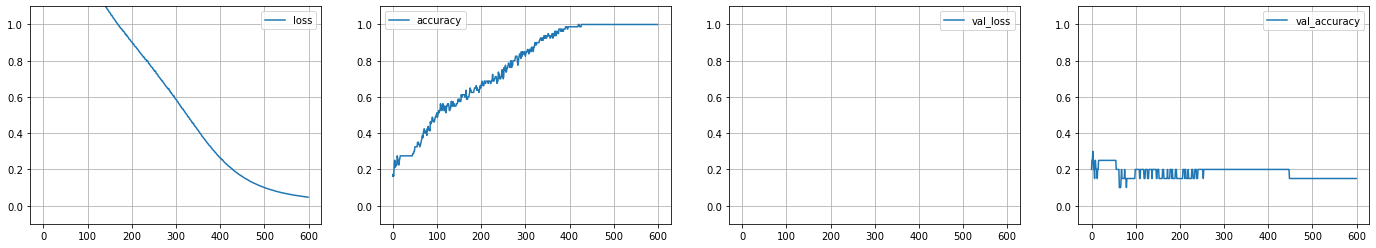

In [10]:
from matplotlib import pyplot as plt

k = hist.history.keys()

w,h = 6,4

fig,ax = plt.subplots(1,len(k),figsize=(w*len(k),h))
for i,n in enumerate(k):
    ax[i].plot(hist.history[n],label=n)
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylim([-.1,1.1])